In [1]:
import pandas as pd

In [3]:
with open('dly/dly1823.csv') as f:
    lines = f.readlines()

In [94]:
list(enumerate(lines))[:10]

[(0, 'Station Name: DUBLIN (Glasnevin)\n'),
 (1, 'Station Height: 18 M \n'),
 (2, 'Latitude:53.370  ,Longitude: -6.270\n'),
 (3, '\n'),
 (4, '\n'),
 (5, 'date: -   09 to 09 utc\n'),
 (6, 'rain: -   Precipitation Amount (mm)\n'),
 (7, 'maxt: -   Maximum Temperature (C)\n'),
 (8, 'mint: -   Minimum Temperature (C)\n'),
 (9, 'gmin: -   09utc Grass Minimum Temperature (C)\n')]

In [47]:
df = pd.read_csv('dly/dly1823.csv', header=0, skiprows=12)['date rain maxt mint'.split()]
df['date'] = pd.to_datetime(df.date, format='%d-%b-%Y')  
df.set_index('date', inplace=True)
df.head()

,rain,maxt,mint
date,,,
1941-01-01,2.4,,
1941-01-02,0.9,,
1941-01-03,0.0,,
1941-01-04,0.0,,
1941-01-05,0.0,,


<Axes: xlabel='date'>

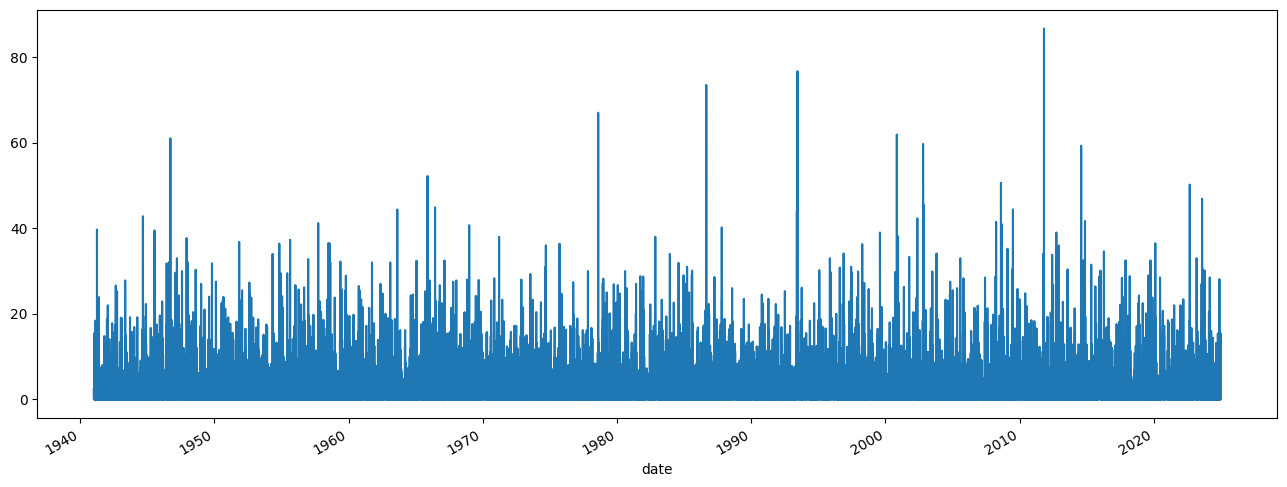

In [52]:
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (16, 6)
df['rain'].plot()

In [70]:
# Only include rows where maxt is not missing:
max_t_rows = df[df.maxt!=' ']
max_t_rows.loc[:, 'maxt'] = max_t_rows.maxt.astype(float)
max_t_rows.head()

,rain,maxt,mint
date,,,
1961-01-01,0.2,9.5,3.7
1961-01-02,5.1,7.2,4.2
1961-01-03,0.4,5.5,0.5
1961-01-04,0.2,5.6,0.4
1961-01-05,10.4,7.2,-1.5


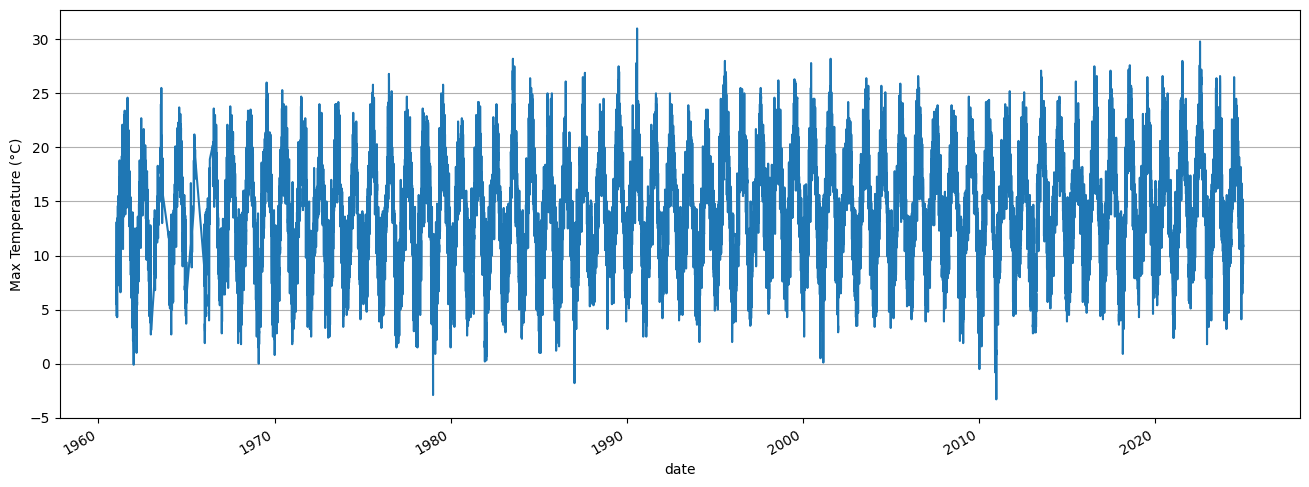

In [77]:
max_t_rows['maxt'].plot()
plt.ylabel('Max Temperature (°C)')
plt.grid(axis='y')
plt.show()

In [84]:
monthly_means = max_t_rows.maxt.resample('ME').mean()
yearly_means = max_t_rows.maxt.resample('YE').mean()


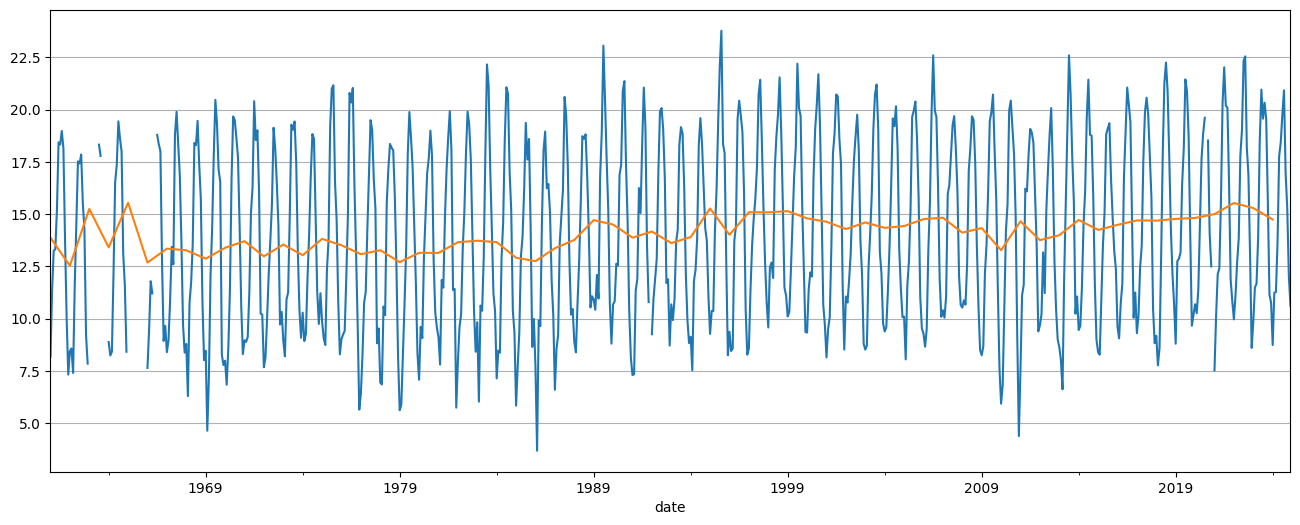

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

monthly_means.plot(ax=ax)
yearly_means.plot(ax=ax)
plt.grid(axis='y')
plt.show()